In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chardet#for encoding
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)

In [2]:
data=pd.read_csv("After_EDA.csv",index_col=0)
data.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,fiveYearsProperty,subway,communityAverage,floor_height,renovationCondition_2,renovationCondition_3,renovationCondition_4,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6,buildingType_2.0,buildingType_3.0,buildingType_4.0,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13,elevator_1.0,floor_type_低,floor_type_底,floor_type_未知,floor_type_顶,floor_type_高
0,116.475489,40.019520,2016,106,415.0,131.00,2.0,1.0,1,1.0,2005.0,0.217,0.0,1.0,56021.0,26.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,116.453917,39.881534,2016,126,575.0,132.38,2.0,2.0,1,2.0,2004.0,0.667,1.0,0.0,71539.0,22.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,116.561978,39.877145,2016,48,1030.0,198.00,3.0,2.0,1,3.0,2005.0,0.500,0.0,0.0,48160.0,4.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,116.438010,40.076114,2016,138,297.5,134.00,3.0,1.0,1,1.0,2008.0,0.273,0.0,0.0,51238.0,21.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4,116.428392,39.886229,2016,286,392.0,81.00,2.0,1.0,1,1.0,1960.0,0.333,1.0,1.0,62588.0,6.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='totalPrice'>

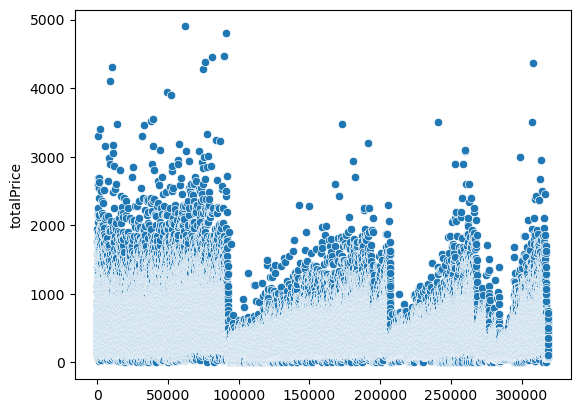

In [3]:
sns.scatterplot(data=data['totalPrice'])

In [4]:
data['totalPrice'].describe()

count    297990.000000
mean        349.178136
std         224.530679
min           0.100000
25%         205.000000
50%         295.000000
75%         427.000000
max        4900.000000
Name: totalPrice, dtype: float64

In [5]:
#Another method to findout q1, q2 and q3
data.totalPrice.quantile([0.25,0.50,0.75])

0.25    205.0
0.50    295.0
0.75    427.0
Name: totalPrice, dtype: float64

In [6]:
Q1=205
Q3=428
IQR=Q3-Q1
print("So,IQR of our totalPrice Features is",IQR)

So,IQR of our totalPrice Features is 223


In [7]:
#Let's Calculate the High and Low Value in a totalPrice Features
High=Q3+1.5*IQR
Low=Q1-1.5*IQR
print("High value of our totalPrice Features is",High)
print("Low value of our totalPrice Features is",Low)

High value of our totalPrice Features is 762.5
Low value of our totalPrice Features is -129.5


In [8]:
df=data.copy()

#Let's remove the outlier
df=df[df['totalPrice']<=High]
df=df[df['totalPrice']>=Low]

<Axes: ylabel='totalPrice'>

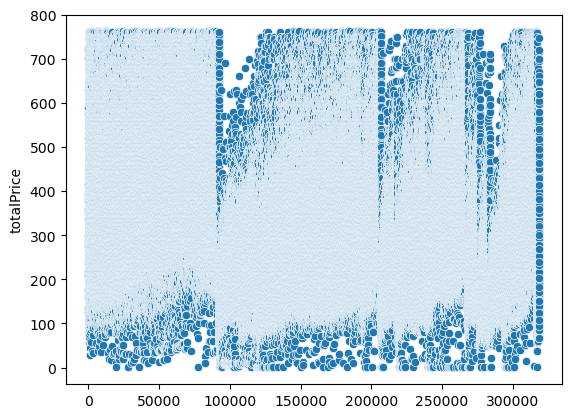

In [9]:
sns.scatterplot(data=df['totalPrice'])

In [10]:
print(data.shape)
print(df.shape)

(297990, 45)
(283901, 45)


In [11]:
print("Total outlier Removed =",data.shape[0]-df.shape[0])

Total outlier Removed = 14089


In [12]:
df.columns

Index(['Lng', 'Lat', 'tradeTime', 'followers', 'totalPrice', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'constructionTime',
       'ladderRatio', 'fiveYearsProperty', 'subway', 'communityAverage',
       'floor_height', 'renovationCondition_2', 'renovationCondition_3',
       'renovationCondition_4', 'buildingStructure_2', 'buildingStructure_3',
       'buildingStructure_4', 'buildingStructure_5', 'buildingStructure_6',
       'buildingType_2.0', 'buildingType_3.0', 'buildingType_4.0',
       'district_2', 'district_3', 'district_4', 'district_5', 'district_6',
       'district_7', 'district_8', 'district_9', 'district_10', 'district_11',
       'district_12', 'district_13', 'elevator_1.0', 'floor_type_低',
       'floor_type_底', 'floor_type_未知', 'floor_type_顶', 'floor_type_高'],
      dtype='object')

In [13]:
X=df.drop(['totalPrice'],axis=1)
y=df['totalPrice']

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

In [15]:
print(model.feature_importances_)

[1.14551388e-02 1.24484970e-02 2.54638341e-01 1.41192056e-02
 1.87308556e-01 6.84851506e-02 2.04632386e-02 7.67502981e-04
 3.35283040e-02 1.29971081e-02 7.51503305e-03 5.88643340e-03
 4.72147881e-03 2.30409237e-01 6.54870272e-03 6.51079602e-04
 9.24180612e-03 1.88069233e-02 1.38236999e-03 5.98620102e-05
 8.47653534e-04 3.16869956e-05 1.60795903e-02 2.02891424e-05
 2.61190623e-03 2.47164733e-03 1.72109266e-03 7.07925505e-04
 1.71994791e-03 1.61245129e-03 5.24476262e-03 5.16470787e-03
 8.33085158e-03 6.75600078e-04 1.62442930e-02 2.43075749e-03
 1.15849253e-04 9.41310225e-04 1.71781519e-02 3.84007784e-03
 3.00451279e-03 1.90305431e-04 3.31597077e-03 4.06468965e-03]


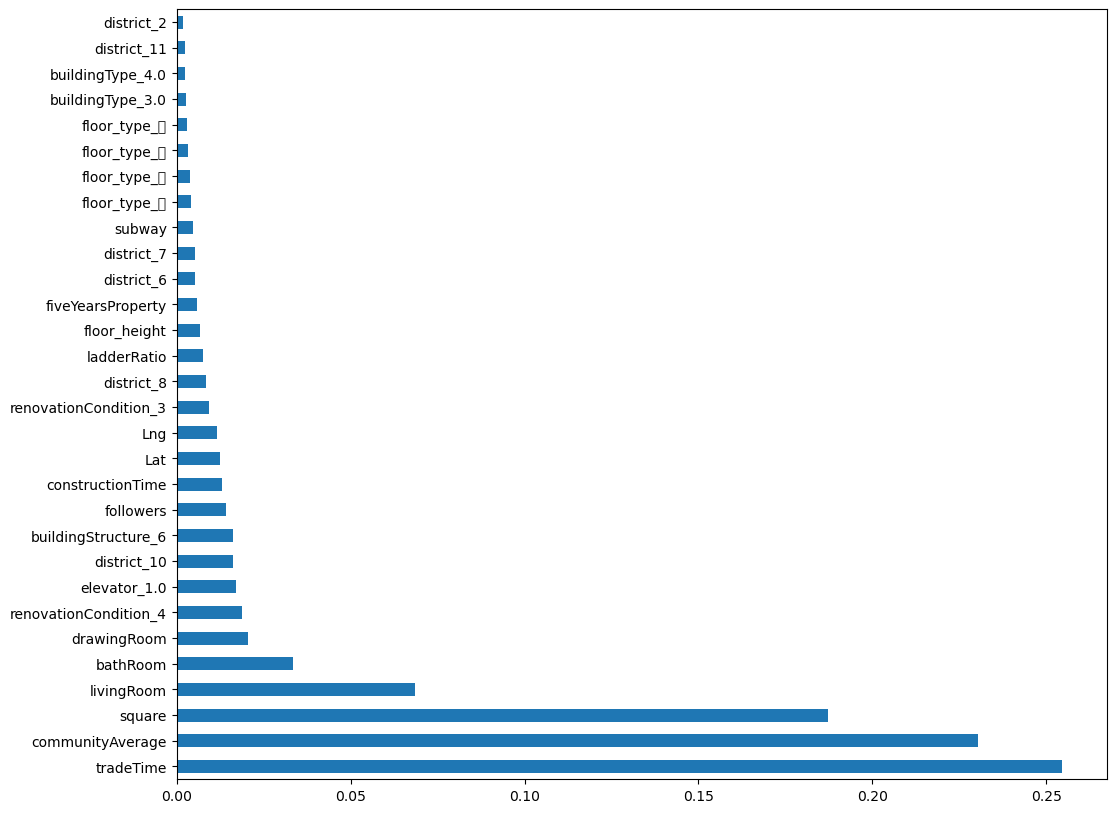

In [16]:
plt.figure(figsize=(12,10))
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(30).plot(kind='barh')
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
col_for_normalization=['Lng', 'Lat','followers','square','livingRoom', 'drawingRoom',
                       'kitchen', 'bathRoom','ladderRatio', 'fiveYearsProperty', 
                       'subway', 'communityAverage','floor_height']
df[col_for_normalization]=scaling.fit_transform(df[col_for_normalization])

In [18]:
df.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,fiveYearsProperty,subway,communityAverage,floor_height,renovationCondition_2,renovationCondition_3,renovationCondition_4,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6,buildingType_2.0,buildingType_3.0,buildingType_4.0,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13,elevator_1.0,floor_type_低,floor_type_底,floor_type_未知,floor_type_顶,floor_type_高
0,0.630809,0.627253,2016,0.092738,415.0,0.272992,0.250,0.2,0.333333,0.142857,2005.0,2.028094e-08,0.0,1.0,0.262240,0.609756,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,0.597040,0.406733,2016,0.110236,575.0,0.276039,0.250,0.4,0.333333,0.285714,2004.0,6.523868e-08,1.0,0.0,0.352324,0.512195,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,0.572140,0.717698,2016,0.120735,297.5,0.279617,0.375,0.2,0.333333,0.142857,2008.0,2.587568e-08,0.0,0.0,0.234474,0.487805,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4,0.557084,0.414236,2016,0.250219,392.0,0.162585,0.250,0.2,0.333333,0.142857,1960.0,3.187004e-08,1.0,1.0,0.300362,0.121951,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.616393,0.582255,2016,0.049869,275.6,0.100757,0.125,0.0,0.333333,0.142857,2005.0,3.187004e-08,1.0,0.0,0.330259,0.170732,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [19]:
df.to_csv("Data_For_Model.csv")